In [44]:
import pandas as pd
import seaborn as sns
from prophet import Prophet
import matplotlib.pyplot as plt

In [45]:
raw_data = pd.read_excel('joonggonara_iphone.xlsx', index_col=0)

In [46]:
raw_data

,판매 상태,제목,url,가격
2022-11-01 00:00:00,판매,86762 아이폰11PRO MAX 미드나잇 그린 64GB 배터리91%,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,470000
2022-11-01 00:03:00,판매,15만원 아이폰8 가성비좋은 꿀 공기기 판매합니다.,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,150000
2022-11-01 00:04:00,판매,부산 김해 아이폰13프로 그라파이트 128기가 배터리93 105만 13PRO,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,1050000
2022-11-01 00:05:00,판매,"광주 아이폰6S,64G,골드,광주광역시",https://cafe.naver.com/ca-fe/cafes/10050146/ar...,160000
2022-11-01 00:06:00,판매,[판매] ﻿아이폰12프로 그래파이트 128GB A급 공기계 [76만],https://cafe.naver.com/ca-fe/cafes/10050146/ar...,760000
...,...,...,...,...
2022-11-10 14:58:00,판매,아이폰13 스타라이트 256기가 특S급 / 직거래,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,900000
2022-11-10 15:00:00,판매,아이폰 11 128기가 파손폰 판매합니다,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,250000
2022-11-10 15:01:00,판매,아이폰12미니 128G 화이트 액정무잔상 가성비꿀폰 30만원팝니다,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,300000
2022-11-10 15:02:00,판매,아이폰 11프로,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,400000


In [47]:
'''
제품별 가격의 전체 평균, 최대/최솟값, 지역별 평균, 최대/최솟값 --> 시각화하기
'''

'\n제품별 가격의 전체 평균, 최대/최솟값, 지역별 평균, 최대/최솟값 --> 시각화하기\n'

In [48]:
raw_data = raw_data[raw_data['가격'] > 0]
raw_data['가격'] = raw_data['가격'].astype('int64')

1) NaN값을 제거했고 (0보다 큰 값만 가져오기 때문에 dropna와 실질적으로 동일하게 적용됨)

2) 기존의 '가격' 테이블이 float형 자료를 갖고 있었기에 int64형으로 바꿨습니다.

In [49]:
raw_data

,판매 상태,제목,url,가격
2022-11-01 00:00:00,판매,86762 아이폰11PRO MAX 미드나잇 그린 64GB 배터리91%,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,470000
2022-11-01 00:03:00,판매,15만원 아이폰8 가성비좋은 꿀 공기기 판매합니다.,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,150000
2022-11-01 00:04:00,판매,부산 김해 아이폰13프로 그라파이트 128기가 배터리93 105만 13PRO,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,1050000
2022-11-01 00:05:00,판매,"광주 아이폰6S,64G,골드,광주광역시",https://cafe.naver.com/ca-fe/cafes/10050146/ar...,160000
2022-11-01 00:06:00,판매,[판매] ﻿아이폰12프로 그래파이트 128GB A급 공기계 [76만],https://cafe.naver.com/ca-fe/cafes/10050146/ar...,760000
...,...,...,...,...
2022-11-10 14:58:00,판매,아이폰13 스타라이트 256기가 특S급 / 직거래,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,900000
2022-11-10 15:00:00,판매,아이폰 11 128기가 파손폰 판매합니다,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,250000
2022-11-10 15:01:00,판매,아이폰12미니 128G 화이트 액정무잔상 가성비꿀폰 30만원팝니다,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,300000
2022-11-10 15:02:00,판매,아이폰 11프로,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,400000


In [50]:
raw_data.drop(index = raw_data[raw_data.가격 > 2000000].index, inplace=True)
raw_data.drop(index = raw_data[raw_data.가격 < 50000].index, inplace=True)

해당 자료에서도 광고성 글들이 비정상적인 가격을 기재하고 있어서 일단 전반적인 전처리는 동일하게 유지 해놓고 진행 했습니다.

In [51]:
onsale_data = raw_data[raw_data['판매 상태'] == '판매']
onsale_data

,판매 상태,제목,url,가격
2022-11-01 00:00:00,판매,86762 아이폰11PRO MAX 미드나잇 그린 64GB 배터리91%,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,470000
2022-11-01 00:03:00,판매,15만원 아이폰8 가성비좋은 꿀 공기기 판매합니다.,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,150000
2022-11-01 00:04:00,판매,부산 김해 아이폰13프로 그라파이트 128기가 배터리93 105만 13PRO,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,1050000
2022-11-01 00:05:00,판매,"광주 아이폰6S,64G,골드,광주광역시",https://cafe.naver.com/ca-fe/cafes/10050146/ar...,160000
2022-11-01 00:06:00,판매,[판매] ﻿아이폰12프로 그래파이트 128GB A급 공기계 [76만],https://cafe.naver.com/ca-fe/cafes/10050146/ar...,760000
...,...,...,...,...
2022-11-10 14:58:00,판매,아이폰13 스타라이트 256기가 특S급 / 직거래,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,900000
2022-11-10 15:00:00,판매,아이폰 11 128기가 파손폰 판매합니다,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,250000
2022-11-10 15:01:00,판매,아이폰12미니 128G 화이트 액정무잔상 가성비꿀폰 30만원팝니다,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,300000
2022-11-10 15:02:00,판매,아이폰 11프로,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,400000


판매 완료된 데이터의 수가 적어 먼저 판매중인 자료로 학습을 진행하고, 

학습의 정답 레이블을 판매 완료 가격으로 지정하여 예측 및 시장가격 조사를 할 계획입니다. 

In [52]:
raw_data.가격

2022-11-01 00:00:00     470000
2022-11-01 00:03:00     150000
2022-11-01 00:04:00    1050000
2022-11-01 00:05:00     160000
2022-11-01 00:06:00     760000
                        ...   
2022-11-10 14:58:00     900000
2022-11-10 15:00:00     250000
2022-11-10 15:01:00     300000
2022-11-10 15:02:00     400000
2022-11-10 15:04:00     850000
Name: 가격, Length: 10642, dtype: int64

In [53]:
raw_data['제목'] = raw_data['제목'].replace(" ","",regex=True)
raw_data['제목']

2022-11-01 00:00:00       86762아이폰11PROMAX미드나잇그린64GB배터리91%
2022-11-01 00:03:00                15만원아이폰8가성비좋은꿀공기기판매합니다.
2022-11-01 00:04:00    부산김해아이폰13프로그라파이트128기가배터리93105만13PRO
2022-11-01 00:05:00                   광주아이폰6S,64G,골드,광주광역시
2022-11-01 00:06:00       [판매]﻿아이폰12프로그래파이트128GBA급공기계[76만]
                                      ...                 
2022-11-10 14:58:00                 아이폰13스타라이트256기가특S급/직거래
2022-11-10 15:00:00                     아이폰11128기가파손폰판매합니다
2022-11-10 15:01:00        아이폰12미니128G화이트액정무잔상가성비꿀폰30만원팝니다
2022-11-10 15:02:00                                아이폰11프로
2022-11-10 15:04:00                    아이폰13프로128G시에라블루민트급
Name: 제목, Length: 10642, dtype: object

아이폰11


C:\Users\k5000\AppData\Local\Temp\ipykernel_54008\351209791.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finding['제목'] = search_name


<AxesSubplot:xlabel='제목', ylabel='가격'>

<Figure size 1080x360 with 0 Axes>

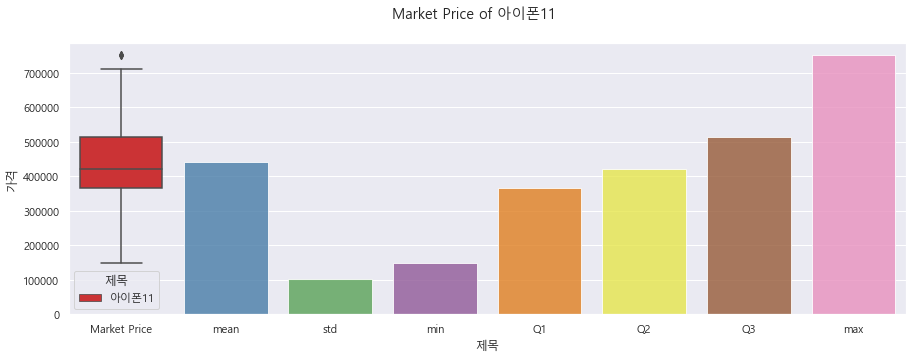

In [55]:
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

search_name = input()

plt.rcParams['font.family'] = 'Malgun Gothic'
finding = onsale_data[onsale_data['제목'].str.contains(search_name, regex=False, case=False)]
finding['제목'] = search_name
plt.figure(figsize=(15,5))

INFO = finding['가격'].describe()
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Market Price of ' + search_name)
plot_index = ['Market Price', 'mean', 'std', 'min', 'Q1', 'Q2', 'Q3', 'max']

sns.boxplot(x=finding['제목'],y=finding['가격'],palette="Set1", hue=finding['제목'])
sns.barplot(x=plot_index, y=INFO.values, alpha=0.8, palette='Set1', orient='v')

In [56]:
finding = finding.reset_index(drop=False)
finding

,index,판매 상태,제목,url,가격
0,2022-11-01 00:00:00,판매,아이폰11,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,470000
1,2022-11-01 00:16:00,판매,아이폰11,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,440000
2,2022-11-01 00:26:00,판매,아이폰11,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,520000
3,2022-11-01 00:42:00,판매,아이폰11,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,400000
4,2022-11-01 00:43:00,판매,아이폰11,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,480000
...,...,...,...,...,...
1434,2022-11-10 13:25:00,판매,아이폰11,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,420000
1435,2022-11-10 13:29:00,판매,아이폰11,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,420000
1436,2022-11-10 13:34:00,판매,아이폰11,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,480000
1437,2022-11-10 13:38:00,판매,아이폰11,https://cafe.naver.com/ca-fe/cafes/10050146/ar...,480000


시계열 예측을 위하여 작성날짜에 대한 column을 구분할 필요가 있습니다. 현재 xlsx 파일은 index값이 작성날짜로 할당되어 있기에 새롭게 초기화를 하여 구분했습니다.

In [57]:
m = Prophet() 

finding['floor'] = 0 #최ㅎ
finding['ds'] = finding['index']
finding['y'] = finding['가격']
finding.drop(labels=['index','가격'],axis=1,inplace=True)

Prophet 라이브러리의 시계열 예측을 시작하기에 앞서, 예측에 필요한 컬럼인 ds와 y를 구분하는 단계입니다.

In [58]:
m.fit(finding)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
C:\Users\k5000\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [59]:
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

C:\Users\k5000\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\k5000\miniconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\k5000\miniconda3\lib\site-packages\prophet\plot.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
C:\Users\k5000\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


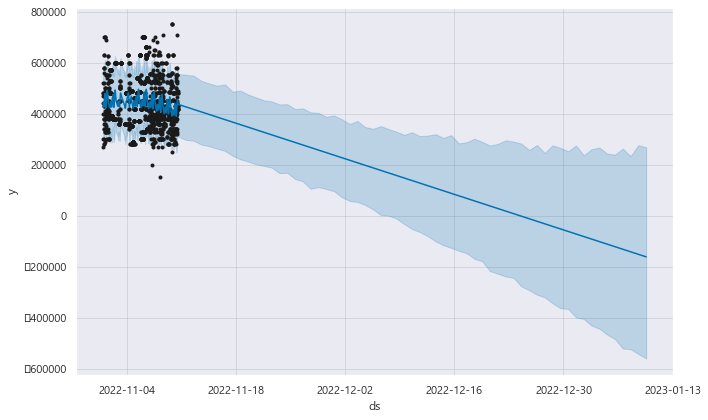

C:\Users\k5000\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


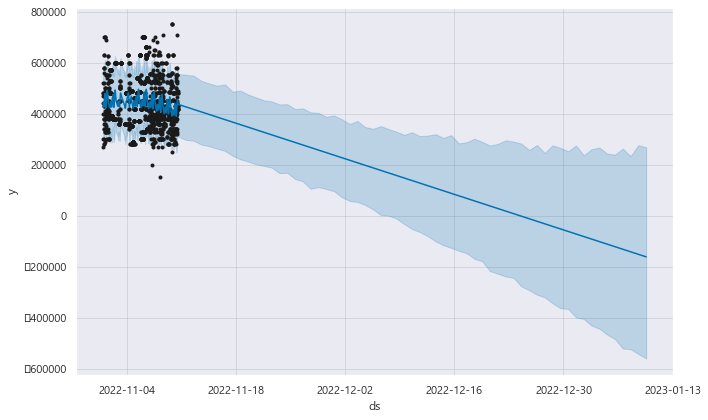

In [60]:
m.plot(forecast)

Prophet model을 fitting하고, 미래시간에 대한 dataframe을 만들어 predict를 완료한 단계입니다. 예측을 수행하기에 충분한 데이터를 보유하고 있지 않아 현재는 선형적인 그래프의 모습을 띄고 있으나, 데이터가 많을 경우 정상적으로 작동될 것으로 기대됩니다.